<a href="https://colab.research.google.com/github/abkerper/DS4002_Project2/blob/main/Draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/abkerper/DS4002_Project2

Cloning into 'DS4002_Project2'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 3.69 MiB | 5.17 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import numpy as np
import pandas as pd
import datetime
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [4]:
df_type = pd.read_csv('/content/SA_0000001400.csv')
df_sex = pd.read_csv('/content/SA_0000001688.csv')

In [5]:
df_total = pd.concat([df_type,df_sex])

In [6]:
display(df_total.columns)

Index(['Id', 'IndicatorCode', 'SpatialDimension', 'SpatialDimensionValueCode',
       'ParentLocationCode', 'ParentLocation', 'TimeDimension', 'TimeDim',
       'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
       'DisaggregatingDimension2', 'DisaggregatingDimension2ValueCode',
       'DisaggregatingDimension3', 'DisaggregatingDimension3ValueCode',
       'DataSourceDimension', 'DataSourceDimensionValueCode', 'Value',
       'NumericValue', 'Low', 'High', 'Comments', 'Date', 'TimeDimensionValue',
       'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')

In [7]:
df_type = df_type[df_type['SpatialDimension']=='COUNTRY']

In [8]:
df_type = df_type[df_type['DisaggregatingDimension1ValueCode']=='ALCOHOLTYPE_SA_TOTAL']

In [9]:
display(df_type.head())

,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,ParentLocationCode,ParentLocation,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
8,1133,SA_0000001400,COUNTRY,GIN,AFR,Africa,YEAR,1966,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHGIN,0.16,0.16,NaN,NaN,NaN,2018-05-11T09:14:17Z,1966,1966-01-01,1966-12-31
15,2745,SA_0000001400,COUNTRY,POL,EUR,Europe,YEAR,1991,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHPOL,8.63,8.63,NaN,NaN,NaN,2018-05-11T09:17:34Z,1991,1991-01-01,1991-12-31
18,3452,SA_0000001400,COUNTRY,SVN,EUR,Europe,YEAR,1984,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHSVN,17.23,17.23,NaN,NaN,NaN,2018-05-11T09:21:59Z,1984,1984-01-01,1984-12-31
34,5920,SA_0000001400,COUNTRY,VEN,AMR,Americas,YEAR,1973,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHVEN,5.61,5.61,NaN,NaN,NaN,2018-05-11T09:08:11Z,1973,1973-01-01,1973-12-31
43,7475,SA_0000001400,COUNTRY,DJI,EMR,Eastern Mediterranean,YEAR,1992,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHDJI,0.60,0.60,NaN,NaN,NaN,2018-05-11T09:11:48Z,1992,1992-01-01,1992-12-31


In [10]:
df_country = df_type[['SpatialDimensionValueCode','NumericValue','TimeDimensionValue']]

In [11]:
countries = ['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','LUX','MLT','NLD','POL','PRT','ROU','SVK','SVN','ESP','SWE','GBR','USA']

In [12]:
df_country = df_country[df_country['SpatialDimensionValueCode'].isin(countries)]

In [13]:
display(df_country['SpatialDimensionValueCode'].unique())

array(['POL', 'SVN', 'MLT', 'FIN', 'PRT', 'ITA', 'IRL', 'ROU', 'CYP',
       'AUT', 'BEL', 'SVK', 'ESP', 'CZE', 'NLD', 'LVA', 'DEU', 'FRA',
       'SWE', 'USA', 'HUN', 'EST', 'GBR', 'HRV', 'GRC', 'LUX', 'BGR',
       'DNK', 'LTU'], dtype=object)

In [14]:
df_pivot = df_country.pivot(index='TimeDimensionValue', columns='SpatialDimensionValueCode', values='NumericValue')

df_pivot.reset_index(inplace=True)

In [75]:
US = df_pivot[['TimeDimensionValue','USA']]

In [17]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [29]:
import seaborn as sns

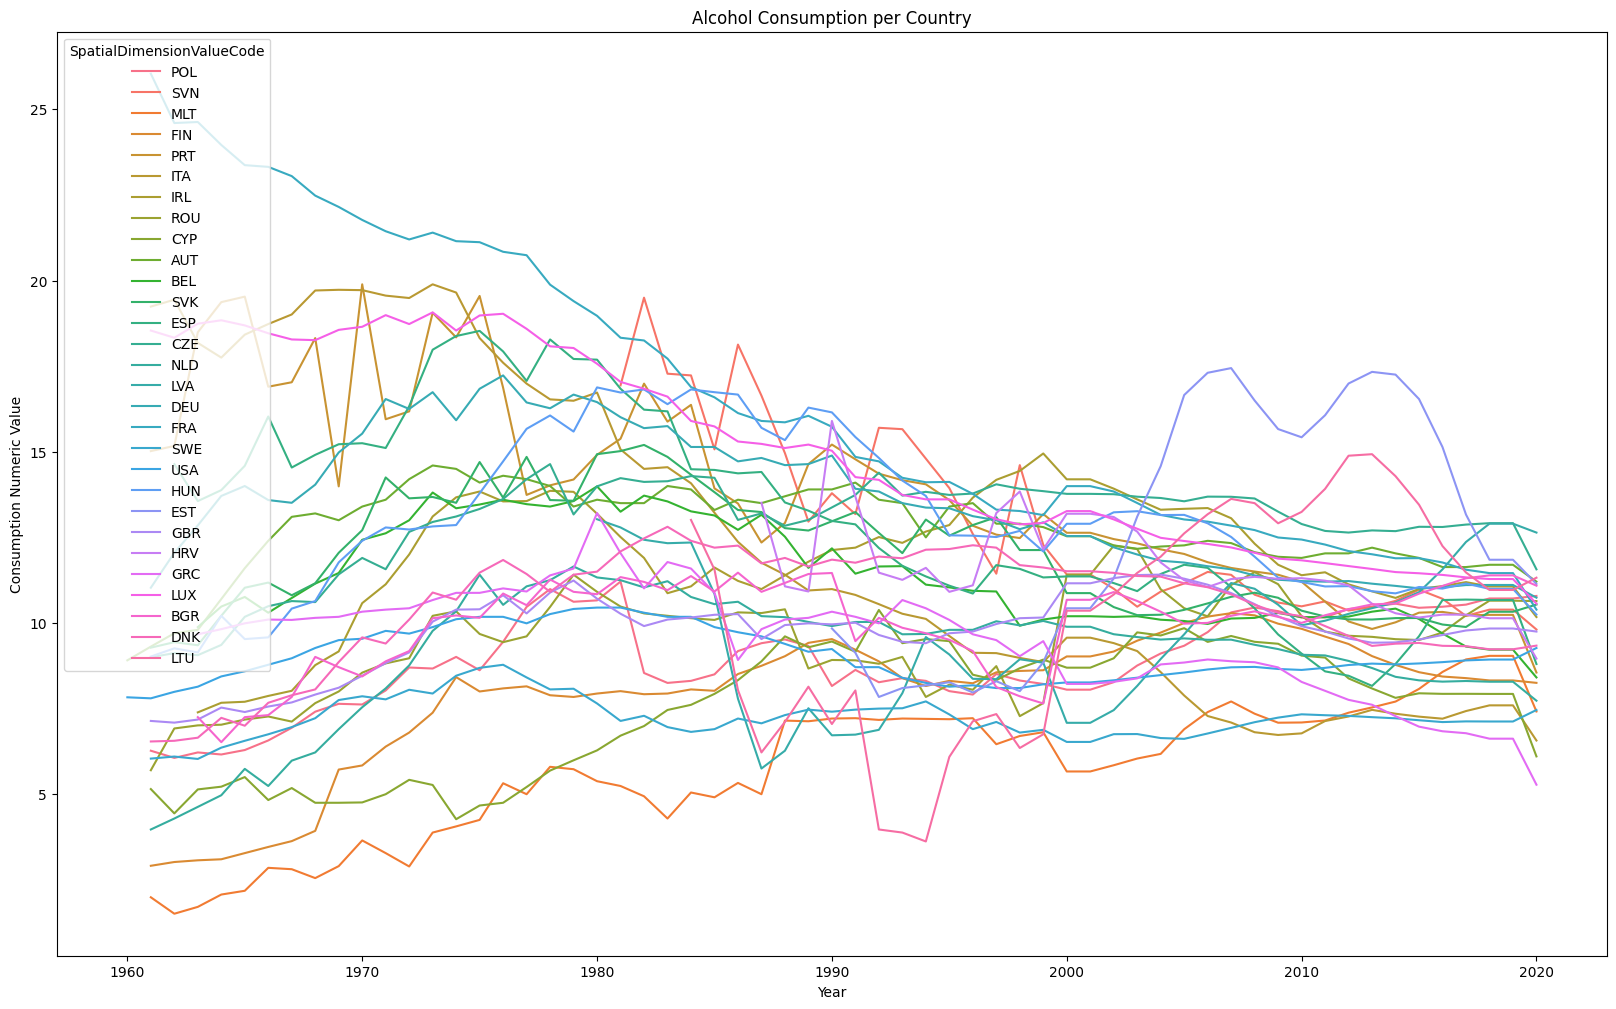

In [37]:
plt.figure(figsize=(20, 12))

sns.lineplot(data=df_country, x = 'TimeDimensionValue', y = 'NumericValue', hue = 'SpatialDimensionValueCode')

plt.title('Alcohol Consumption per Country')
plt.xlabel('Year')
plt.ylabel('Consumption Numeric Value')

plt.show()

In [76]:
US.rename(columns={'USA': 'ConsumptionValue'}, inplace=True)
US.set_index('TimeDimensionValue', inplace=True)

In [73]:
US = US.reset_index(drop=True)
US.index = pd.to_datetime(US.index, format='%Y')

In [86]:
display(US)

SpatialDimensionValueCode,ConsumptionValue
TimeDimensionValue,
1960-01-01,7.83000
1961-01-01,7.80000
1962-01-01,7.99000
1963-01-01,8.14000
1964-01-01,8.44000
...,...
2016-01-01,8.85690
2017-01-01,8.90737
2018-01-01,8.93260


In [87]:
#Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(US['ConsumptionValue'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=159.359, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1.534, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=157.390, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4.891, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-11.513, Time=0.97 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=-9.570, Time=1.49 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.12 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-17.920, Time=1.60 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-7.753, Time=0.63 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=-15.921, Time=2.61 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=-24.056, Time=2.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   61
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                  23.013
Date:                             Fri, 18 Oct 2024   AIC                            -32.025
Time:                                     17:29:20   BIC                            -18.782
Sample:                                 01-01-1960   HQIC                           -27.001
                                      - 01-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9780      0.010    204.747      0.000       1.959       1.997
ar.L2         -0.9944      0.009   -112.147      0.000      -1.012      -0.977
ma.L1         -1.0908      0.248     -4.396      0.000      -1.577      -0.604
ma.L2          0.1352      0.192      0.705      0.481      -0.241       0.511
ar.S.L12      -0.8812      0.171     -5.142      0.000      -1.217      -0.545
ar.S.L24      -0.5601      0.201     -2.781      0.005      -0.955      -0.165
sigma2         0.0147      0.005      2.754      0.006       0.004       0.025
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.09
Prob(Q):                              0.99   Prob(JB):                         0.35
Heteroskedasticity (H):               1.03   Skew:                            -0.49
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
# Split data into train / test sets
train = US.iloc[:len(US)-5]
test = US.iloc[len(US)-5:] # set ten years for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['ConsumptionValue'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   ConsumptionValue   No. Observations:                   56
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                  10.886
Date:                            Fri, 18 Oct 2024   AIC                            -11.772
Time:                                    17:29:28   BIC                             -2.966
Sample:                                01-01-1960   HQIC                            -8.524
                                     - 01-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2496      0.186      1.343      0.179      -0.115       0.614
ar.S.L12      -0.5579      0.608     -0.917      0.359      -1.750       0.634
ar.S.L24      -0.6371      0.335     -1.900      0.057      -1.295       0.020
ma.S.L12      -0.2491      1.181     -0.211      0.833      -2.564       2.066
sigma2         0.0228      0.008      2.792      0.005       0.007       0.039
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.24   Prob(JB):                         0.32
Heteroskedasticity (H):               0.69   Skew:                            -0.55
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='TimeDimensionValue'>

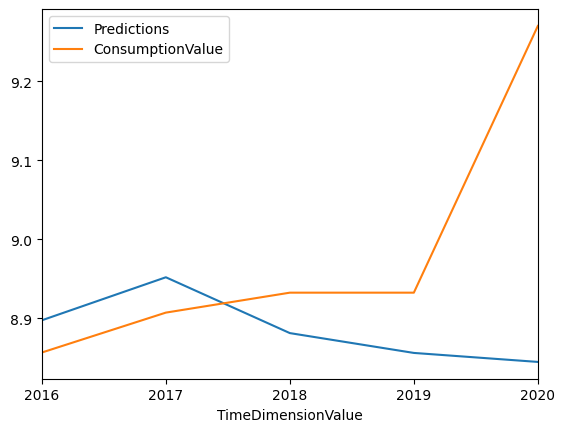

In [89]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['ConsumptionValue'].plot(legend = True)

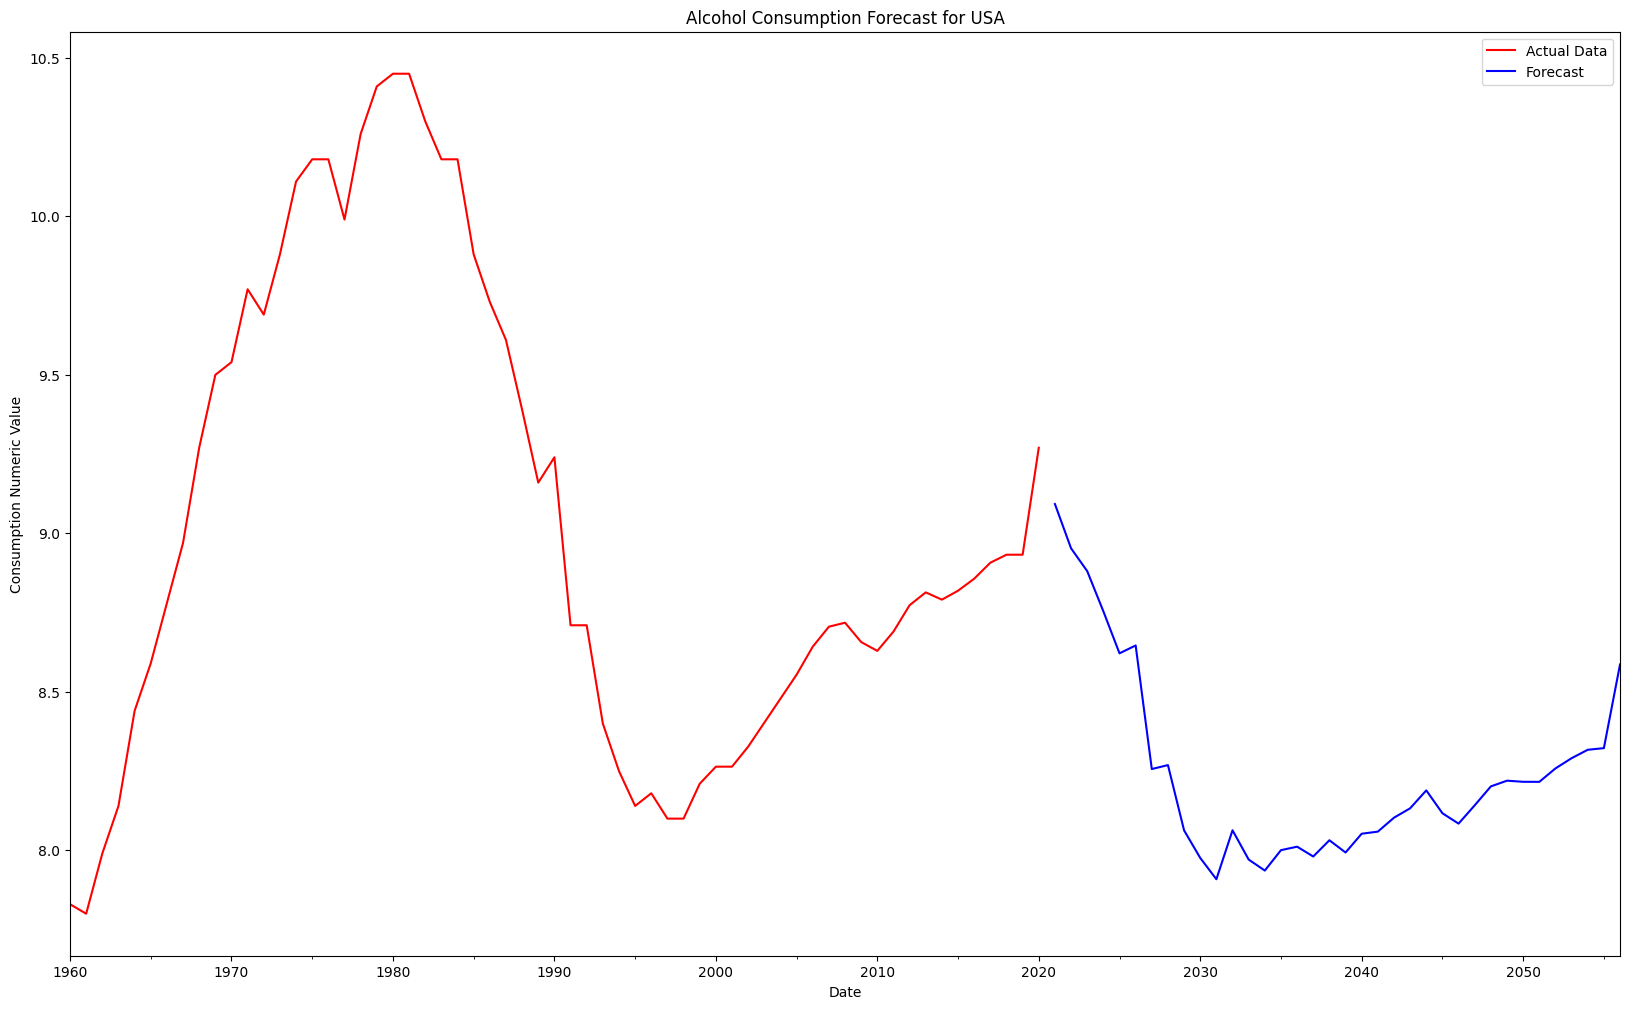

In [94]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMAX model
model = SARIMAX(US['ConsumptionValue'],
                order=(0, 1, 1),
                seasonal_order=(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start=len(US),
                          end=(len(US)-1) + 3 * 12,
                          typ='levels').rename('Forecast')

# Plot the original data and the forecast with custom colors
plt.figure(figsize=(20, 12))  # Set the figure size

# Plot the original data in blue
US['ConsumptionValue'].plot(legend=True, color='red', label='Actual Data')

# Plot the forecast in red
forecast.plot(legend=True, color='blue', label='Forecast')

# Add title and labels
plt.title('Alcohol Consumption Forecast for USA') # Adjust format as needed\
plt.xlabel('Date')
plt.ylabel('Consumption Numeric Value')

# Show the plot
plt.show()


In 2008, the actual value was 8.71812, forecasted was 8.71534, spike: 0.00278


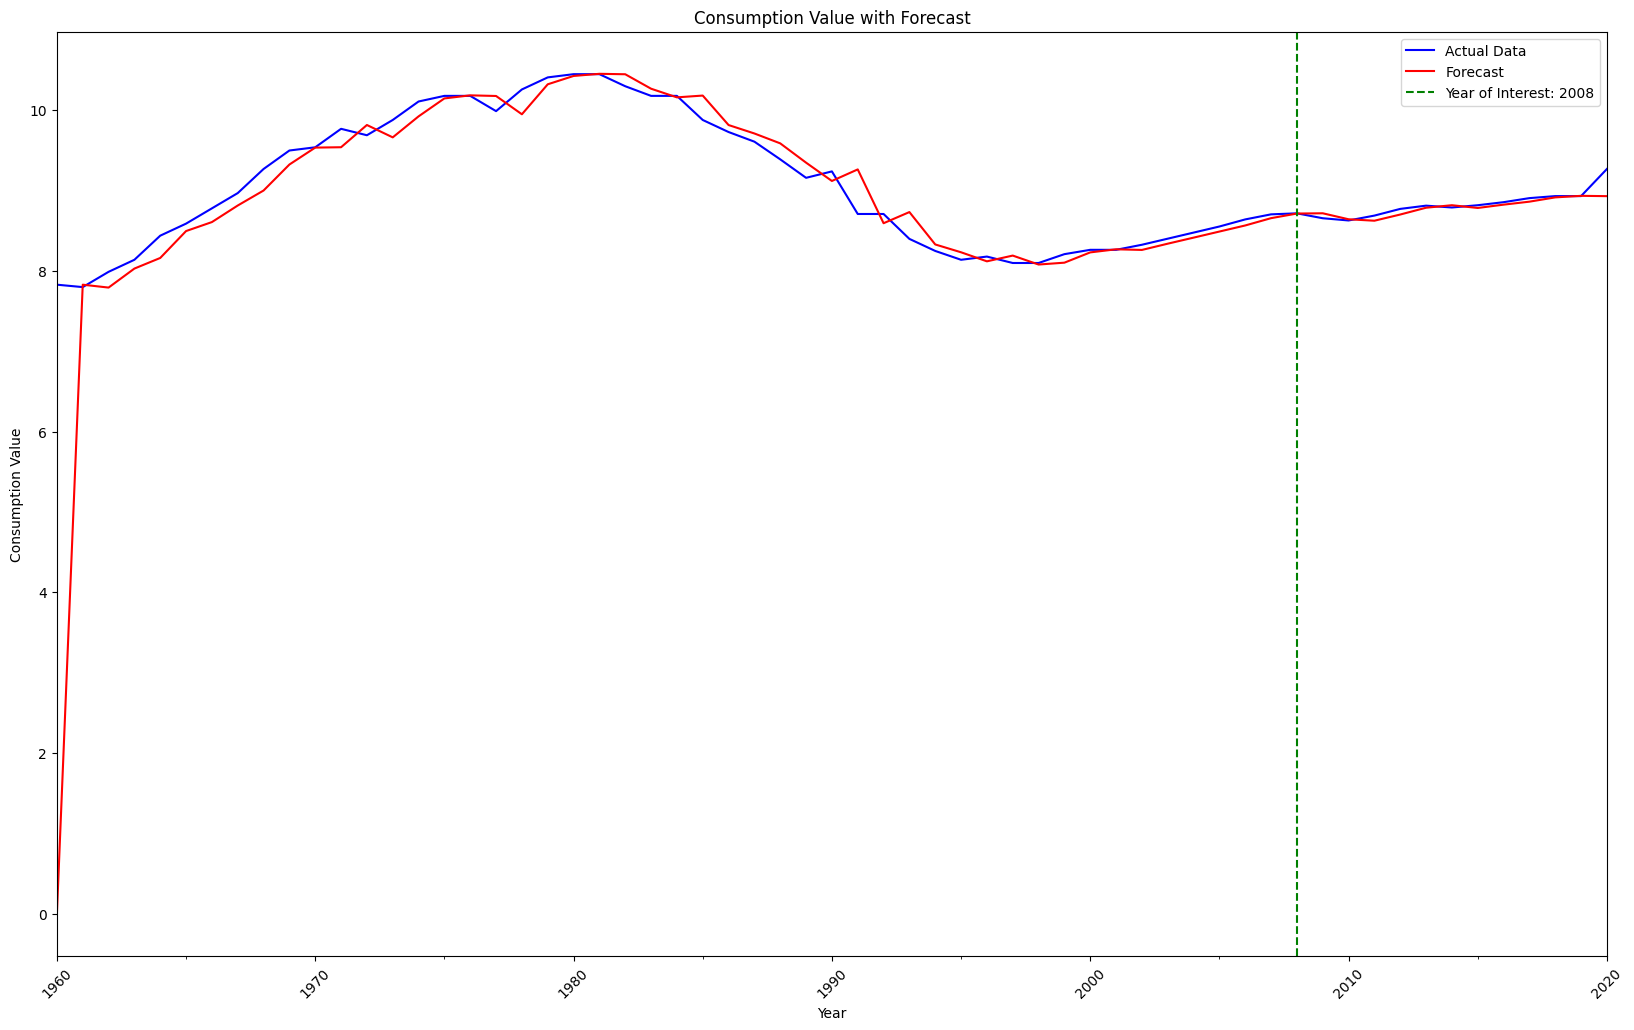

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

model = SARIMAX(US['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

# Step 3: Generate predictions for the entire series
US['Forecast'] = result.predict(start=US.index[0], end=US.index[-1])

# Step 4: Calculate spikes for specific years
# For example, you want to analyze spikes in 2016 and 2020
years_of_interest = [2008]
for year in years_of_interest:
    actual_value = US.loc[pd.to_datetime(str(year))]['ConsumptionValue']
    forecasted_value = US.loc[pd.to_datetime(str(year))]['Forecast']
    spike = actual_value - forecasted_value
    if spike > 0:
        print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
    else:
        print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
US['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
US['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='Year of Interest: 2008')
plt.legend()
plt.show()
